In [3]:
import numpy as np
import pickle
import re
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.stem import SnowballStemmer
import gensim
from gensim.models import Word2Vec
from gensim.models import KeyedVectors
from sklearn.cluster import KMeans,DBSCAN,AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import KMeans,DBSCAN,AgglomerativeClustering

In [4]:
df=pd.read_csv("..\\..\\..\\Reviews.csv")

In [5]:
#print(df.shape)
#print(df.columns)
df.dropna(inplace=True)
df=df[df.Score != 3]
print(df['Score'].value_counts())
positive_or_negative=lambda a: "positive" if ((type(a)== type(2)) and (a > 3)) else "negative"
df['Score']=df['Score'].map(positive_or_negative)
print(df['Score'].value_counts())

5    363111
4     80655
1     52264
2     29743
Name: Score, dtype: int64
positive    443766
negative     82007
Name: Score, dtype: int64


In [6]:
##soring data according product id
df_sorted=df.sort_values('ProductId', axis=0, ascending=True, inplace=False, kind='quicksort', na_position='last')

##deduplication of entries
final=df_sorted.drop_duplicates(subset={"UserId","ProfileName","Time","Text"}, keep='first', inplace=False)
final=final[final.HelpfulnessNumerator<=final.HelpfulnessDenominator]


print(final.shape)

#check how much data is present, len(final['ProductId'])
#print(final['ProductId'].size[0]*1.0/df['ProductId'].size[0]*1.0)*100

(364159, 10)


In [7]:
final.head(1)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
150522,150523,0006641040,A2P4F2UO0UMP8C,"Elizabeth A. Curry ""Lovely Librarian""",0,0,positive,1096675200,MMMM chicken soup....,Summary: A young boy describes the usefulness...


In [8]:
final['Score'].value_counts()
###taking sample
final_sample= final.sample(frac=0.01)
df_sorted=final_sample.sort_values('Time')
print(df_sorted.shape)


(3642, 10)


In [9]:
# loading stop words from nltk library
stop_words = set(stopwords.words('english'))
sno = SnowballStemmer('english')

In [10]:
df_sorted['newText']=np.nan
df_sorted.head(1)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,newText
200020,200021,B0000D9N5Q,A176XYKMRF1U8Q,Lance Arthur,0,0,positive,1067990400,A small taste of heaven,Pierre Robert is similar to Brie but with a sm...,NaN


In [11]:
def nlp_preprocessing(total_text, index, column):
    if type(total_text) is not int:
        string = ""
        final_string=""
        # replace every special char with space
        total_text = re.sub('[^a-zA-Z0-9\n]', ' ', total_text)
        # replace multiple spaces with single space
        total_text = re.sub('\s+',' ', total_text)
        # converting all the chars into lower-case.
        total_text = total_text.lower()
        
        for word in total_text.split():
        # if the word is a not a stop word then retain that word from the data
            if not word in stop_words:
                #word=sno(word)
                string += word + " "
        
        df_sorted.loc[index,column] = string
        #print(string)
        #final_string.append(string)

In [12]:
df_sorted['NewText']=None
##slicing for simplicity
#df_sorted=df_sorted.iloc[0:100,:]
for index, row in df_sorted.iterrows():
    nlp_preprocessing(df_sorted['Text'][index], index, 'NewText')



In [13]:
df_sorted.head(2)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,newText,NewText
200020,200021,B0000D9N5Q,A176XYKMRF1U8Q,Lance Arthur,0,0,positive,1067990400,A small taste of heaven,Pierre Robert is similar to Brie but with a sm...,NaN,pierre robert similar brie smoother creamier t...
441318,441319,B0000D9N17,A3OMD9I5JK8NFE,baby test,29,34,positive,1071100800,A great way to learn about different flavors,This is a great way of learning about differen...,NaN,great way learning different cheeses flavors p...


In [14]:
def sent_vect(list_of_sent):
    sent_vectors = []; # the avg-w2v for each sentence/review is stored in this list
    for sent in list_of_sent: # for each review/sentence
        sent_vec = np.zeros(50) # as word vectors are of zero length
        cnt_words =0; # num of words with a valid vector in the sentence/review
        for word in sent: # for each word in a review/sentence
            try:
                vec = w2v_model.wv[word]
                sent_vec += vec
                cnt_words += 1
            except:
                pass
        sent_vec /= cnt_words
        sent_vectors.append(sent_vec)
    print(len(sent_vectors))
    print(len(sent_vectors[0]))
    return sent_vectors

In [18]:
##split sentenses to list
list_of_sent=[]
def list_sentense(df_sorted):
    for sent in df_sorted['NewText'].values:
        sentence=sent.split()
        list_of_sent.append(sentence)
    return list_of_sent

list_sentenses=list_sentense(df_sorted)
print(list_sentenses[2])
print(len(list_sentenses))
print(df_sorted['NewText'].shape)


['pesto', 'genovese', 'favorite', 'pesto', 'capelli', 'angeli', 'family', 'love', 'pesto', 'crostini', 'fact', 'become', 'staple', 'house', 'regular', 'mealtimes', 'p', 'sun', 'dried', 'tomatoes', 'tend', 'quot', 'tang', 'quot', 'tomatoes', 'pesto', 'certainly', 'give', 'crostini', 'added', 'spiciness', 'get', 'wrong', 'use', 'pesto', 'crostini', 'alone', 'favorite', 'way', 'using', 'would', 'great', 'pasta', 'p', 'love', 'tomatoes', 'especially', 'sun', 'dried', 'tomatoes', 'think', 'go', 'wrong', 'pesto', 'recommend', 'highly']
3642
(3642,)


In [19]:
##creating our own word2vec model
w2v_model=gensim.models.Word2Vec(list_sentenses,min_count=5,size=50, workers=4)

In [20]:
print(len(list_sentenses))
df_sorted.shape
df_sorted['list_Sentenses']=list_sentenses
df_sorted.head(1)

3642


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,newText,NewText,list_Sentenses
374330,374331,B00004CI84,A1OP3SQP78M1PP,James Gowen,0,0,positive,1015718400,"A movie to ""literally die for!!!""",Beetlejuice is not a movie that you can't watc...,NaN,beetlejuice movie watch 5 000 times one funies...,"[beetlejuice, movie, watch, 5, 000, times, one..."


In [29]:

size=int(df_sorted.shape[0]*0.7)
df_train=df_sorted.iloc[:size,:]
df_test=df_sorted.iloc[size:,]
#df_train= df_train.sample(frac=0.01)
#df_test= df_test.sample(frac=0.01)


In [31]:
#print(df_train.head(1))
#print(df_test.head(1))
df_train.shape
df_train.columns.values
#df_train.NewText

array(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text',
       'newText', 'NewText'], dtype=object)

In [32]:
y_train=df_train['Score']
y_test=df_test['Score']
df_train['Score'].value_counts()

positive    2179
negative     370
Name: Score, dtype: int64

In [24]:

tf_idf_vect = TfidfVectorizer(ngram_range=(1,3))
train_tf_idf = tf_idf_vect.fit_transform(df_train['NewText'].values)
test_tf_idf=tf_idf_vect.transform(df_test['NewText'].values)
tfidf_feat = tf_idf_vect.get_feature_names()
print(len(tfidf_feat))
tfidf_feat[100000:100010]

181707


['many though also',
 'many time',
 'many times',
 'many times amazon',
 'many times buy',
 'many times every',
 'many times kids',
 'many times opened',
 'many tortilla',
 'many tortilla chips']

In [26]:
import pdb
# TF-IDF weighted Word2Vec
def tfidf_word2vec(w2v_model,list_of_sent,final_tf_idf):
    tfidf_sent_vectors = []; # the tfidf-w2v for each sentence/review is stored in this list
    row=0;
    for sent in list_of_sent: # for each review/sentence
        sent_vec = np.zeros(50) # as word vectors are of zero length
        weight_sum =0; # num of words with a valid vector in the sentence/review
        for word in sent: # for each word in a review/sentence
            try:
                vec = w2v_model.wv[word]
            
                # obtain the tf_idfidf of a word in a sentence/review
                
                tfidf = final_tf_idf[row, tfidf_feat.index(word)]
                sent_vec += (vec * tfidf)
                weight_sum += tfidf
        #pdb.set_trace() 
        #print(weight_sum)
            except:
                pass
        if weight_sum != 0:
            sent_vec /= weight_sum
        #pdb.set_trace() 
        tfidf_sent_vectors.append(sent_vec)
        row += 1
        #print("1 sentense completed",tfidf_sent_vectors)
        print("row..",row)
        
    return tfidf_sent_vectors


In [27]:

tfidfword2vec_train_vectors=tfidf_word2vec(w2v_model,df_train['list_Sentenses'],train_tf_idf)


row.. 1
row.. 2
row.. 3
row.. 4
row.. 5
row.. 6
row.. 7
row.. 8
row.. 9
row.. 10
row.. 11
row.. 12
row.. 13
row.. 14
row.. 15
row.. 16
row.. 17
row.. 18
row.. 19
row.. 20
row.. 21
row.. 22
row.. 23
row.. 24
row.. 25
row.. 26
row.. 27
row.. 28
row.. 29
row.. 30
row.. 31
row.. 32
row.. 33
row.. 34
row.. 35
row.. 36
row.. 37
row.. 38
row.. 39
row.. 40
row.. 41
row.. 42
row.. 43
row.. 44
row.. 45
row.. 46
row.. 47
row.. 48
row.. 49
row.. 50
row.. 51
row.. 52
row.. 53
row.. 54
row.. 55
row.. 56
row.. 57
row.. 58
row.. 59
row.. 60
row.. 61
row.. 62
row.. 63
row.. 64
row.. 65
row.. 66
row.. 67
row.. 68
row.. 69
row.. 70
row.. 71
row.. 72
row.. 73
row.. 74
row.. 75
row.. 76
row.. 77
row.. 78
row.. 79
row.. 80
row.. 81
row.. 82
row.. 83
row.. 84
row.. 85
row.. 86
row.. 87
row.. 88
row.. 89
row.. 90
row.. 91
row.. 92
row.. 93
row.. 94
row.. 95
row.. 96
row.. 97
row.. 98
row.. 99
row.. 100
row.. 101
row.. 102
row.. 103
row.. 104
row.. 105
row.. 106
row.. 107
row.. 108
row.. 109
row.. 110
row.. 11

row.. 835
row.. 836
row.. 837
row.. 838
row.. 839
row.. 840
row.. 841
row.. 842
row.. 843
row.. 844
row.. 845
row.. 846
row.. 847
row.. 848
row.. 849
row.. 850
row.. 851
row.. 852
row.. 853
row.. 854
row.. 855
row.. 856
row.. 857
row.. 858
row.. 859
row.. 860
row.. 861
row.. 862
row.. 863
row.. 864
row.. 865
row.. 866
row.. 867
row.. 868
row.. 869
row.. 870
row.. 871
row.. 872
row.. 873
row.. 874
row.. 875
row.. 876
row.. 877
row.. 878
row.. 879
row.. 880
row.. 881
row.. 882
row.. 883
row.. 884
row.. 885
row.. 886
row.. 887
row.. 888
row.. 889
row.. 890
row.. 891
row.. 892
row.. 893
row.. 894
row.. 895
row.. 896
row.. 897
row.. 898
row.. 899
row.. 900
row.. 901
row.. 902
row.. 903
row.. 904
row.. 905
row.. 906
row.. 907
row.. 908
row.. 909
row.. 910
row.. 911
row.. 912
row.. 913
row.. 914
row.. 915
row.. 916
row.. 917
row.. 918
row.. 919
row.. 920
row.. 921
row.. 922
row.. 923
row.. 924
row.. 925
row.. 926
row.. 927
row.. 928
row.. 929
row.. 930
row.. 931
row.. 932
row.. 933
row.. 934


row.. 1595
row.. 1596
row.. 1597
row.. 1598
row.. 1599
row.. 1600
row.. 1601
row.. 1602
row.. 1603
row.. 1604
row.. 1605
row.. 1606
row.. 1607
row.. 1608
row.. 1609
row.. 1610
row.. 1611
row.. 1612
row.. 1613
row.. 1614
row.. 1615
row.. 1616
row.. 1617
row.. 1618
row.. 1619
row.. 1620
row.. 1621
row.. 1622
row.. 1623
row.. 1624
row.. 1625
row.. 1626
row.. 1627
row.. 1628
row.. 1629
row.. 1630
row.. 1631
row.. 1632
row.. 1633
row.. 1634
row.. 1635
row.. 1636
row.. 1637
row.. 1638
row.. 1639
row.. 1640
row.. 1641
row.. 1642
row.. 1643
row.. 1644
row.. 1645
row.. 1646
row.. 1647
row.. 1648
row.. 1649
row.. 1650
row.. 1651
row.. 1652
row.. 1653
row.. 1654
row.. 1655
row.. 1656
row.. 1657
row.. 1658
row.. 1659
row.. 1660
row.. 1661
row.. 1662
row.. 1663
row.. 1664
row.. 1665
row.. 1666
row.. 1667
row.. 1668
row.. 1669
row.. 1670
row.. 1671
row.. 1672
row.. 1673
row.. 1674
row.. 1675
row.. 1676
row.. 1677
row.. 1678
row.. 1679
row.. 1680
row.. 1681
row.. 1682
row.. 1683
row.. 1684
row.. 1685

row.. 2340
row.. 2341
row.. 2342
row.. 2343
row.. 2344
row.. 2345
row.. 2346
row.. 2347
row.. 2348
row.. 2349
row.. 2350
row.. 2351
row.. 2352
row.. 2353
row.. 2354
row.. 2355
row.. 2356
row.. 2357
row.. 2358
row.. 2359
row.. 2360
row.. 2361
row.. 2362
row.. 2363
row.. 2364
row.. 2365
row.. 2366
row.. 2367
row.. 2368
row.. 2369
row.. 2370
row.. 2371
row.. 2372
row.. 2373
row.. 2374
row.. 2375
row.. 2376
row.. 2377
row.. 2378
row.. 2379
row.. 2380
row.. 2381
row.. 2382
row.. 2383
row.. 2384
row.. 2385
row.. 2386
row.. 2387
row.. 2388
row.. 2389
row.. 2390
row.. 2391
row.. 2392
row.. 2393
row.. 2394
row.. 2395
row.. 2396
row.. 2397
row.. 2398
row.. 2399
row.. 2400
row.. 2401
row.. 2402
row.. 2403
row.. 2404
row.. 2405
row.. 2406
row.. 2407
row.. 2408
row.. 2409
row.. 2410
row.. 2411
row.. 2412
row.. 2413
row.. 2414
row.. 2415
row.. 2416
row.. 2417
row.. 2418
row.. 2419
row.. 2420
row.. 2421
row.. 2422
row.. 2423
row.. 2424
row.. 2425
row.. 2426
row.. 2427
row.. 2428
row.. 2429
row.. 2430

In [28]:
tfidfword2vec_train_vectors[2]

array([ 0.10864537,  0.04326404, -0.22351739, -0.21091442, -0.13417411,
       -0.17134457, -0.1190261 ,  0.16870774,  0.11861978, -0.2522279 ,
        0.07836546, -0.49139067,  0.10453942,  0.19956196,  0.0350673 ,
       -0.12770896,  0.19630374,  0.07004463, -0.04567955,  0.28907296,
        0.07275883,  0.01293621, -0.20573231,  0.00438369,  0.01230952,
        0.32460205, -0.23206291, -0.12448094, -0.04074181, -0.33494247,
       -0.03776814, -0.06208659, -0.05231445, -0.21176372,  0.19390918,
       -0.16514732,  0.30203531, -0.20473555, -0.50094588,  0.01977522,
        0.33413468,  0.15081578, -0.23031194,  0.1430775 , -0.02918625,
       -0.38680234,  0.20657107, -0.15619702, -0.09998441, -0.11594748])

In [16]:
import pickle
def savetofile(obj,filename):
    pickle.dump(obj, open (filename+".p","wb"))
def openfromfile(filename):
    return pickle.load(open (filename+".p","rb"))
#savetofile(tfidfword2vec_train_vectors, "tfidfword2vec_train")
tfidfword2vec_train_loaded=openfromfile("..\\..\\Case_study_2\\tfidfword2vec_train")
y_train=openfromfile("..\\..\\Case_study_2\\y_train")

In [18]:
#tfidfword2vec_test_vectors=tfidf_word2vec(w2v_model,df_test['list_Sentenses'],test_tf_idf)
import copy
tfidfword2vec=copy.deepcopy(tfidfword2vec_train_loaded)


In [20]:
nbrs = NearestNeighbors(n_neighbors=100).fit(tfidfword2vec)
distances, indices = nbrs.kneighbors(tfidfword2vec)


In [21]:
distances.sort(axis=1)
dist=distances[:,99]
dist.sort()
dist

array([0.06292428, 0.06304431, 0.06328465, ..., 0.93573673, 0.95458541,
       1.08407909])

2549

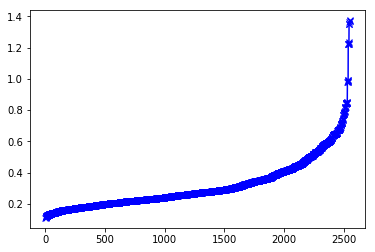

In [112]:
import matplotlib.pyplot as plt
point_index=list(range(1,len(distances)+1))
plt.plot(point_index, dist,'bx-')
#plt,show()
len(point_index)

In [160]:
#tfidfword2vec=StandardScaler().fit_transform(tfidfword2vec)
min_points=len(tfidfword2vec)*2
dbscan=DBSCAN(eps=0.6,min_samples=300)
dbscan.fit(tfidfword2vec)
labels=dbscan.labels_
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_clusters_

1

In [162]:
df_train.loc[:,'dbscan_label']=dbscan.labels_
#df_train.columns.values
#df_train.dbscan_label[0:10]
#df_train=df_train.drop(columns=['dbscan_label'])

In [171]:
outliers=df_train.Text.loc[df_train.dbscan_label==-1].values
outliers[0]
###text has special charecters

'<a href="http://www.amazon.com/gp/product/B000Q37VW6">Chef Boyardee Beef Ravioli - 10/15 Oz. Cans</a> isn\'t the healthiest of food choices, but like many other prepackaged meals that is the norm.<br />I have loved the taste of this since childhood. It\'s like fast food, everyone likes to indulge once in awhile. It\'s an experience of easy fun, on a special day!'

In [161]:
np.unique(dbscan.labels_)

array([-1,  0], dtype=int64)

# KMeans

In [23]:
Sum_of_squared_distances=[]
n_clusters_range=list(range(1,10))
for i in n_clusters_range:
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(tfidfword2vec)
    Sum_of_squared_distances.append(kmeans.inertia_)

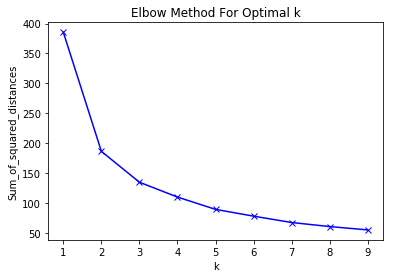

In [24]:
n_clusters_range=list(range(1,10))
plt.plot(n_clusters_range, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [26]:
optimal_clusters=n_clusters_range[np.argmin(Sum_of_squared_distances)]
optimal_clusters

9

In [27]:
kmeans=KMeans(n_clusters=optimal_clusters)
kmeans.fit(tfidfword2vec)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=9, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [35]:
kmeans.labels_
df_train['labels']=kmeans.labels_
np.unique(kmeans.labels_)

C:\Users\admin\AppData\Local\Programs\Python\Python36\Lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


array([0, 1, 2, 3, 4, 5, 6, 7, 8])

In [38]:
df_train.columns.values
df_train.labels[1:10]

441318    8
288964    7
361311    1
375993    3
169233    7
66611     3
148192    4
26493     8
274302    3
Name: labels, dtype: int32

In [39]:
label1=df_train['Text'].loc[df_train['labels']==0].values
label2=df_train['Text'].loc[df_train['labels']==1].values
label3=df_train['Text'].loc[df_train['labels']==2].values
label4=df_train['Text'].loc[df_train['labels']==3].values
label5=df_train['Text'].loc[df_train['labels']==4].values
label6=df_train['Text'].loc[df_train['labels']==5].values
label7=df_train['Text'].loc[df_train['labels']==6].values
label8=df_train['Text'].loc[df_train['labels']==7].values
label9=df_train['Text'].loc[df_train['labels']==8].values

In [84]:
print(label1[2],label1[3],label1[4],sep="\n**********\n")
##all beverages, tea , coffee reviews clustered

A perfect combination of bergamot and tea. Full bergamot flavor. the best Earl Grey tea I have had.
**********
I have never tasted a cinnamon tea as flavorful as this one!  Everyone who drinks it at my house wants to know where they can buy some. It's the best.
**********
I will be purchasing more of these. My hounds LOVE them. These are not messy like the rawhide.


In [69]:
print(label2[5],label1[66],label1[90],sep="\n**********\n")

I absolutely LOVE this oatmeal!!!  It tastes much fresher (not stale) than any other oatmeal I've tasted.  The brown sugar is soft, the texter is creamier, but you still get your fiber.  I like to eat healthy but taste comes first!  This is a breakfast food I enjoy and don't have to feel the least bit guilty about eating.
**********
The makers of these treats only use the best quality products so that our animals get a quality product.  They are made here in the US and my dogs will do almost anything for them.  It is a great way to get them to take their pills.  The  pill goes down and the treat follows.  I've used them now for several years and have never been unhappy with any of the products.  I'd highly recomend them to anyone wanting a quality treat for their animal.
**********
Mr. Bandit loves his Redbarn Filled Bone so much that I am sure that he will ask us to order more! Why not make your dog happy for days for so little money? It's like the best hobby he's ever had! Bandit say

In [76]:
print(label3[2],label1[6],label1[8],sep="\n**********\n")

makes chicken taste so good .  Just coat it and Bake Better than some resturant peanut sauces.
**********
I love this cereal and have not been able to find it for years. It turns out it's here on amazon as well as only in walmart super stores, which sucks because I hate walmart with a passion and won't go there unless it's something I can't get anywhere else or it's late and I need it.<br /><br />However the problem here is that this products description says it's a pack of 4 but I only got 1 box and it says that it's package 1 of 1 and completes my order.<br /><br />When I seen the normal sized box it came in, I thought "well I'm the noob for not reading. It was probably 4 travel boxes" but it wasn't when I opened it and it was just 1 normal box, bot 4 as described.<br /><br />5 for the cereal, 1 for this service.
**********
This has been an excellent product for us.  They include wonderful recipes on the back of the package.  One heads up though:  the Pumpkin Loaf Cake was excellent 

In [74]:
print(label4[1],label1[88],label1[43],sep="\n**********\n")
##all pizza and reviews reviews clustered

The aroma from a pot of this coffee is earthy and heavenly at the same time. Everything about this product--packaging, texture, and taste--tells you that it was lovlngly produced under rigid standards. Moreover,if you've tried a lot of "kona" coffees like I have, you know how widely the taste and quality can vary. This is the coffee you serve to the treasured few in your life who really appreciate the finest.
**********
I had never made my own pizza before. I made a large 16" pie the other day with this. Followed the directions to the letter and it came out wonderfully! The crust is chewy yet crispy. The pizza was on par with my favorite local pizza place (Jockamo's in Indy) and was superior to any frozen pizza i've ever had from DiGiorno or Freschetta. I was pleasantly surprised with how well it came out. And now i can eat pizza at home again since going gluten-free 8 months ago.
**********
This is my favorite evening tea; especially with a little stevia.  Just be aware when buying th

In [75]:
print(label5[99],label5[122],label5[211],sep="\n**********\n")
##all negative reviews clustered

The smell coming out of these cans was putrid. I bought three separate cans and they were all bad. I thought I would go organic, but apparently perservatives are a necessary evil. Don't buy these.
**********
I tried vanilla cake mix and pizza crust mix and was disappoined in both.  They had a medicinal bitter taste and even smelled strange.  I threw both items away.
**********
I've been taking these for over a year, and possibly my chol. has been lowered a little, but who knows really?  I hate taking them, but the alternative is statins. (Another alternative is to ignore cholesterol levels, which may well have nothing to do with heart disease risk if there are no other risk factors, particularly in women.) The new product is greasy, even on the outside, and takes soap to wash off my hands.  It could be the glycerin, but why?  I called the company (there is a toll-free number on the box) to complain about the taste and consistency and ingredients!  They confirmed the reformulation.  The

# AgglomerativeClustering

In [85]:
AgglCluster=AgglomerativeClustering(n_clusters=)
AgglCluster.fit(tfidfword2vec)
    

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
            connectivity=None, linkage='ward', memory=None, n_clusters=6,
            pooling_func=<function mean at 0x0000023875FDA950>)

In [103]:
df_train.drop(Aggl_labels)

NameError: name 'Aggl_labels' is not defined

In [104]:
#small_df.Agg_labels_.value_counts()

#df_train['Aggl_labels']=np.nan
#
print(np.unique(AgglCluster.labels_),AgglCluster.labels_.shape)
df_train.columns.values
df_train.loc[:,'Aggl_labels']=AgglCluster.labels_
#df_train.Aggl_labels

[0 1 2 3 4 5] (2549,)


C:\Users\admin\AppData\Local\Programs\Python\Python36\Lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [106]:
#df_train.Aggl_labels

In [ ]:
label1=df_train['Text'].loc[df_train['Aggl_labels']==0].values
label2=df_train['Text'].loc[df_train['Aggl_labels']==1].values
label3=df_train['Text'].loc[df_train['Aggl_labels']==2].values
label4=df_train['Text'].loc[df_train['Aggl_labels']==3].values
label5=df_train['Text'].loc[df_train['Aggl_labels']==4].values
label6=df_train['Text'].loc[df_train['Aggl_labels']==5].values


In [109]:
print(label1[2],label1[36],label1[25],sep="\n**********\n")
##all tea reviews grouped in cluster1

A perfect combination of bergamot and tea. Full bergamot flavor. the best Earl Grey tea I have had.
**********
I was introduced to this tea in New Zealand and it is by far my favorite black tea.  It arrives well packed and  speedily.  It is a tea lovers tea--we use no other now.
**********
If you are having troubles going to the restroom, eat this once a day and it does wonders.


In [110]:
print(label2[22],label2[31],label2[35],sep="\n**********\n")
##all coffee reviews grouped in cluster1

Purchased this my wife because it was decaffeinted. She loved it and I have to admit I'm kinda fond of it myself. Strongly recommend!
**********
I finally found the BEST coffee to brew at home after seemingly infinite trials and errors. Deep, rich, complex and never bitter no matter how strong I make it. I drink coffee straight up... no milk, no sugar so there's no place to hide and "Cowboy Mud" is great. I got lucky and found it by accident among another 10-brand search for the perfect coffee bean in a recent monthly sale at Amazon for about $5.00 a pound. Still worth it at $9.00.
**********
I think this stuff has waaaaay too much clove... if you've ever accidentally bit down on a whole clove you know somewhat what this tastes like!


In [116]:
print(label3[7],label3[1],label3[26],sep="\n**********\n")
##suger alternative, ceral

I use this in making fake fudge. Sweet, definitely chocolate!I don't use sugar so this works perfectly for me. I would highly recommend to people whether or not they have to control their sugar intake.
**********
I am not a kid, but I speak for my kids, that this is a great ceral. I can not find it in the stores here which is frustrating.  It is low fat, high fiber and not too sugary.  Great as a cereal or as a dry snack.
**********
Now makes an excellant product and amazon provides it at a very good price with prompt delivery.  The trick to avoiding aftertaste with stevia powder is not to try to make the food too sweet.  1/16 of a teaspoon is enough for a 12 ounce cup of tea - sweet but not too sweet and no aftertaste.  Use 1/8 of a teaspoon in 12 oz. of tean and the tea will taste as sweet as soda pop and the aftertaste will still be around an hour later.<br /><br />I have been using this product as a sugar substitute for about a month (replacing aspartame - Equal) and recommend it w

In [119]:
print(label4[3],label4[90],label4[3],sep="\n**********\n")
##Bread and related products

Like most people, I was very skeptical about purchasing baklava online. From my experience, if one leaves out baklava out for a long time, it tends to get extremely hard and the honey drips all over the place. Not the case with this baklava. I received it in the mail a few days ago (I live in University housing and the mail system here takes a couple days to process) and the baklava tastes fantastic. Fresher baklava of course tastes slightly better, but I don't think it could get all that much better than this in terms of mail-order baklava. Highly recommended.
**********
This bread makes the best toast. It lasts for months, fresh, on the cupboard shelf, and keeps nicely in the fridge once opened. It has a tangy sourdough taste rather than the slight bitterness often found with whole grains and a dense, slightly chewy whole grain texture. I would not make a sandwich with it--it is too crumbly, but it is great for open-faced toast, spread with jam, peanut butter or pate. I order it by t

In [122]:
print(label5[3],label5[90],label5[36],sep="\n**********\n")
##tea related products

I'm not really a big fan of fruity teas, but the combination of the green tea and the orange, jasmine and passionfruit is subtle, and evens out the usually bitter taste of straight green tea. I highly recommend it!
**********
I bought this candy after a few of us at work had sat around remembering the old fashioned candies that we could no longer find in stores.  When I brought the candy to work, everyone loved it and we made converts of people who had never heard of it.
**********
This chai latte mix is weak and not creamy.  For Starbucks like taste, try the Big Train canister.
